In [3]:
import pandas as pd

wine = pd.read_csv('./csv/WineQT.csv' , encoding= 'cp949')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


C:\Users\PC1\AppData\Local\Temp\ipykernel_2468\85378873.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df, dtype=np.bool)


<AxesSubplot:title={'center':'Person Correlation of Features'}>

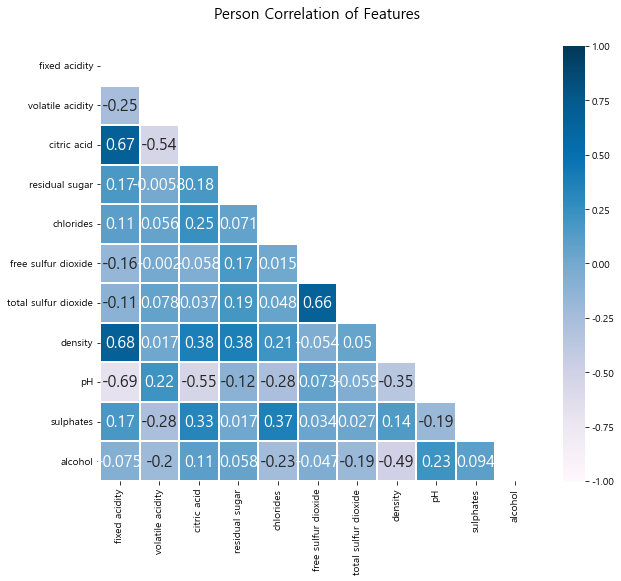

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

x = wine.drop(['quality', 'Id'], axis= 1)
df = x.corr()

mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("Person Correlation of Features", y = 1.05, size = 15)
sns.heatmap(x.astype(float).corr(), linewidths = 0.1, mask=mask ,vmax = 1.0, 
           vmin= -1.0 , square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

In [5]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 출력을 위한 데이터 프레임 형성
vif = pd.DataFrame()

# VIF 값과 각 Feature 이름에 대해 설정
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns 

# VIF 값이 높은 순으로 정렬
vif = vif.sort_values(by="VIF Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

,VIF Factor,features
0,1435.099175,density
1,1043.339933,pH
2,123.962480,alcohol
3,74.548916,fixed acidity
4,21.510809,sulphates
5,17.040785,volatile acidity
6,9.219394,citric acid
7,6.717067,chlorides
8,6.298331,free sulfur dioxide
9,6.224163,total sulfur dioxide


In [6]:
import statsmodels.api as sm
y = wine['quality']

results = sm.OLS(y, sm.add_constant(x)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     61.49
Date:                Thu, 10 Nov 2022   Prob (F-statistic):          4.26e-107
Time:                        18:12:15   Log-Likelihood:                -1106.7
No. Observations:                1143   AIC:                             2237.
Df Residuals:                    1131   BIC:                             2298.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   21.5495     24.773      0.870      0.385     -27.057      70.156
fixed acidity            0.0230      0.030      0.759      0.448      -0.036       0.082
volatile acidity        -1.1291      0.141     -8.023      0.000      -1.405      -0.853
citric acid             -0.1319      0.173     -0.762      0.446      -0.471       0.208
residual sugar           0.0135      0.018      0.732      0.464      -0.023       0.050
chlorides               -1.7082      0.497     -3.434      0.001      -2.684      -0.732
free sulfur dioxide      0.0024      0.003      0.928      0.354      -0.003       0.007
total sulfur dioxide    -0.0028      0.001     -3.321      0.001      -0.004      -0.001
density                -17.4493     25.286     -0.690      0.490     -67.062      32.163
pH                      -0.4082      0.223     -1.832      0.067      -0.845       0.029
sulphates                0.8752      0.134      6.555      0.000       0.613       1.137
alcohol                  0.2801      0.031      8.963      0.000       0.219       0.341
==============================================================================
Omnibus:                       19.010   Durbin-Watson:                   1.780
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.205
Skew:                          -0.141   Prob(JB):                     4.55e-07
Kurtosis:                       3.731   Cond. No.                     1.12e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

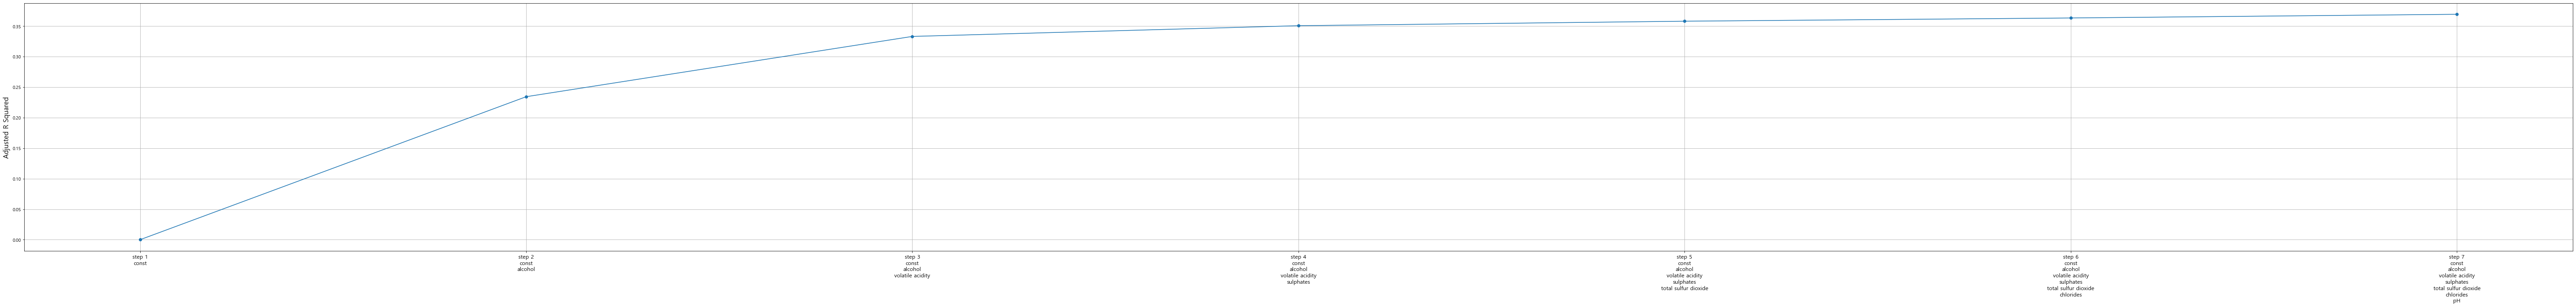

In [7]:
X_train = sm.add_constant(x)
y_train = y


def stepwise_feature_selection(X_train, y_train, variables=X_train.columns.tolist() ):
    import statsmodels.api as sm
    import matplotlib.pyplot as plt
    import warnings
    warnings.filterwarnings("ignore")
    
    y = y_train ## 반응 변수

    selected_variables = [] ## 선택된 변수들
    sl_enter = 0.05
    sl_remove = 0.05
    
    sv_per_step = [] ## 각 스텝별로 선택된 변수들
    adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
    steps = [] ## 스텝
    step = 0
    while len(variables) > 0:
        remainder = list(set(variables) - set(selected_variables))
        pval = pd.Series(index=remainder) ## 변수의 p-value
        ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
        ## 선형 모형을 적합한다.
        for col in remainder: 
            X = X_train[selected_variables+[col]]
            X = sm.add_constant(X)
            model = sm.OLS(y,X).fit(disp=0)
            pval[col] = model.pvalues[col]
    
        min_pval = pval.min()
        if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
            selected_variables.append(pval.idxmin())
            ## 선택된 변수들에대해서
            ## 어떤 변수를 제거할지 고른다.
            while len(selected_variables) > 0:
                selected_X = X_train[selected_variables]
                selected_X = sm.add_constant(selected_X)
                selected_pval = sm.OLS(y,selected_X).fit(disp=0).pvalues[1:] ## 절편항의 p-value는 뺀다
                max_pval = selected_pval.max()
                if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                    remove_variable = selected_pval.idxmax()
                    selected_variables.remove(remove_variable)
                else:
                    break
            
            step += 1
            steps.append(step)
            adj_r_squared = sm.OLS(y,sm.add_constant(X_train[selected_variables])).fit(disp=0).rsquared_adj
            adjusted_r_squared.append(adj_r_squared)
            sv_per_step.append(selected_variables.copy())
        else:
            break

    fig = plt.figure(figsize=(100,10))
    fig.set_facecolor('white')
    
    font_size = 15
    plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
    plt.plot(steps,adjusted_r_squared, marker='o')
      
    plt.ylabel('Adjusted R Squared',fontsize=font_size)
    plt.grid(True)
    plt.show()

    return selected_variables
    

selected_variables = stepwise_feature_selection(X_train, y_train)

### 전진선택법, 후진소거법

### 윈저라이징

In [18]:
x.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

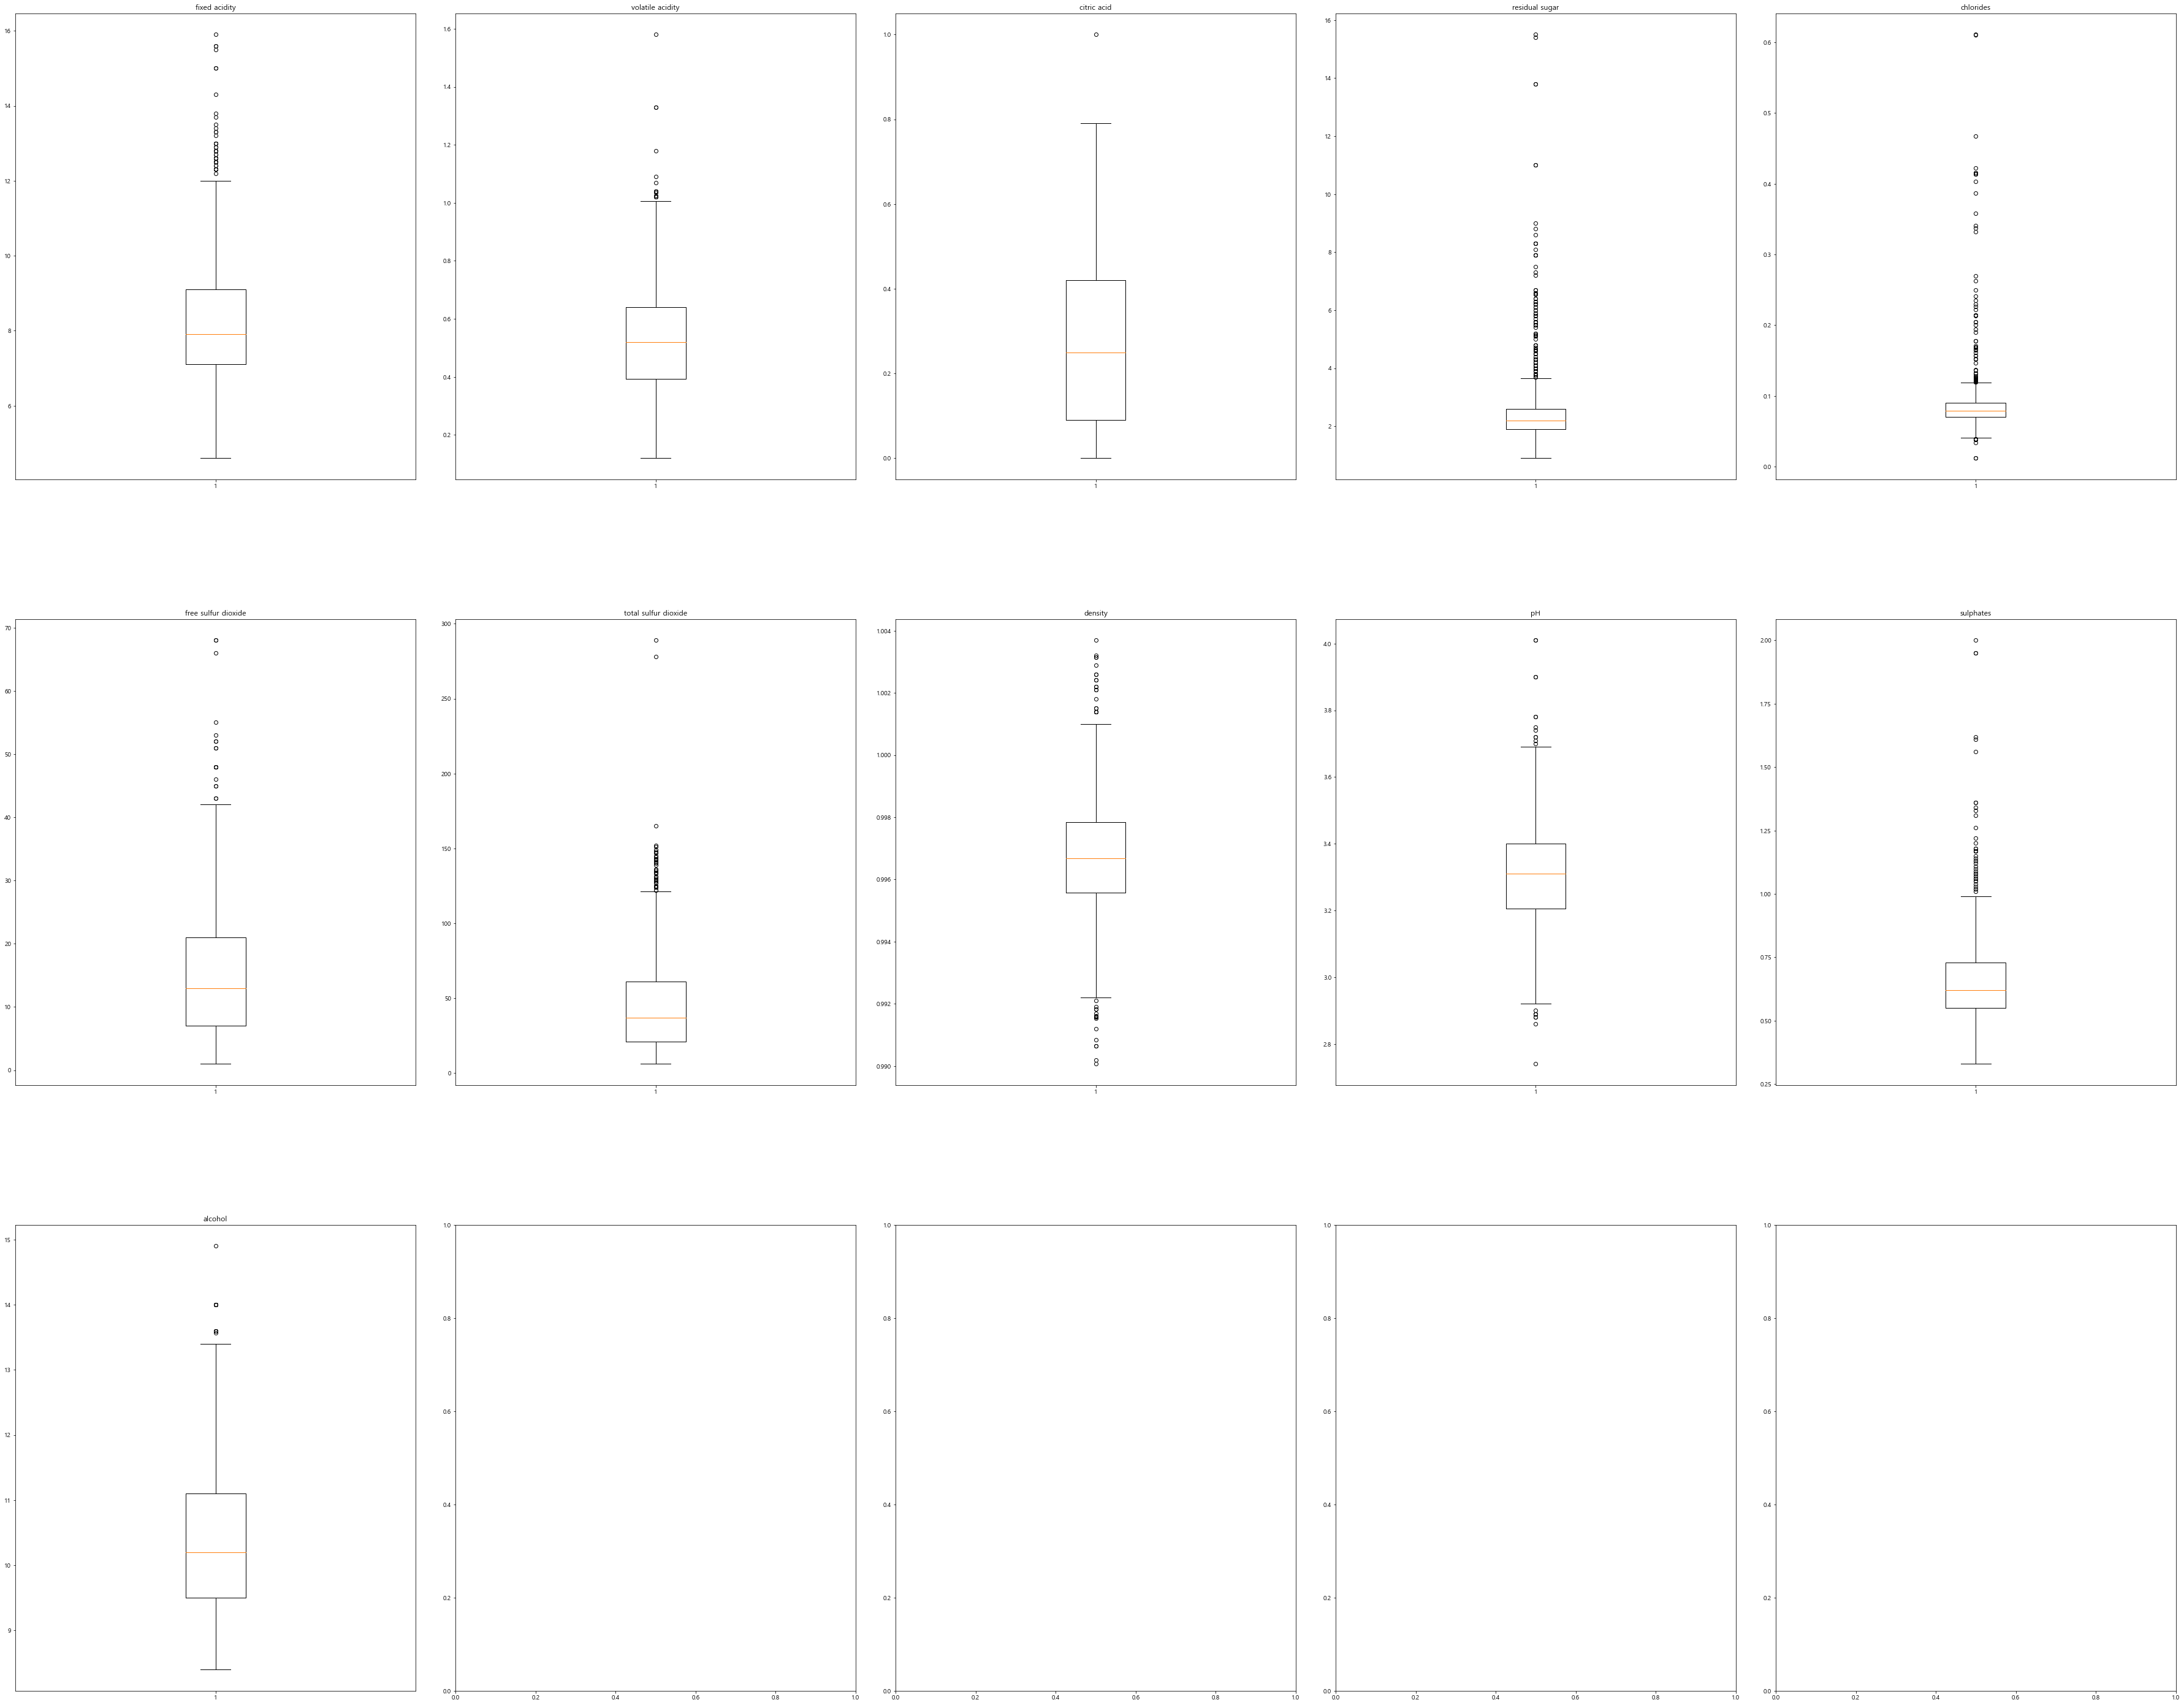

In [20]:
import seaborn as sns #heatmap 만들기 위한 라이브러리
import matplotlib.pyplot as plt
import warnings
import numpy as np
import matplotlib

matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = [5, 4]
fig, axs = plt.subplots(3, 5)
try : 
    for i in range(0,3,1):
        for j in range(0,5,1):
            if i == 0 :
                axs[i,j].boxplot(x.iloc[:,j])
                axs[i,j].set_title(x.iloc[:,j].name)
            
            if i == 1 :
                axs[i,j].boxplot(x.iloc[:,j+5])
                axs[i,j].set_title(x.iloc[:,j+5].name)

            if i == 2 :
                axs[i,j].boxplot(x.iloc[:,j+10])
                axs[i,j].set_title(x.iloc[:,j+10].name)
                
        fig.subplots_adjust(left=0.01, right=9.8, bottom=0.5, top=10,
                        hspace=0.3, wspace=0.1) 
except :
    pass

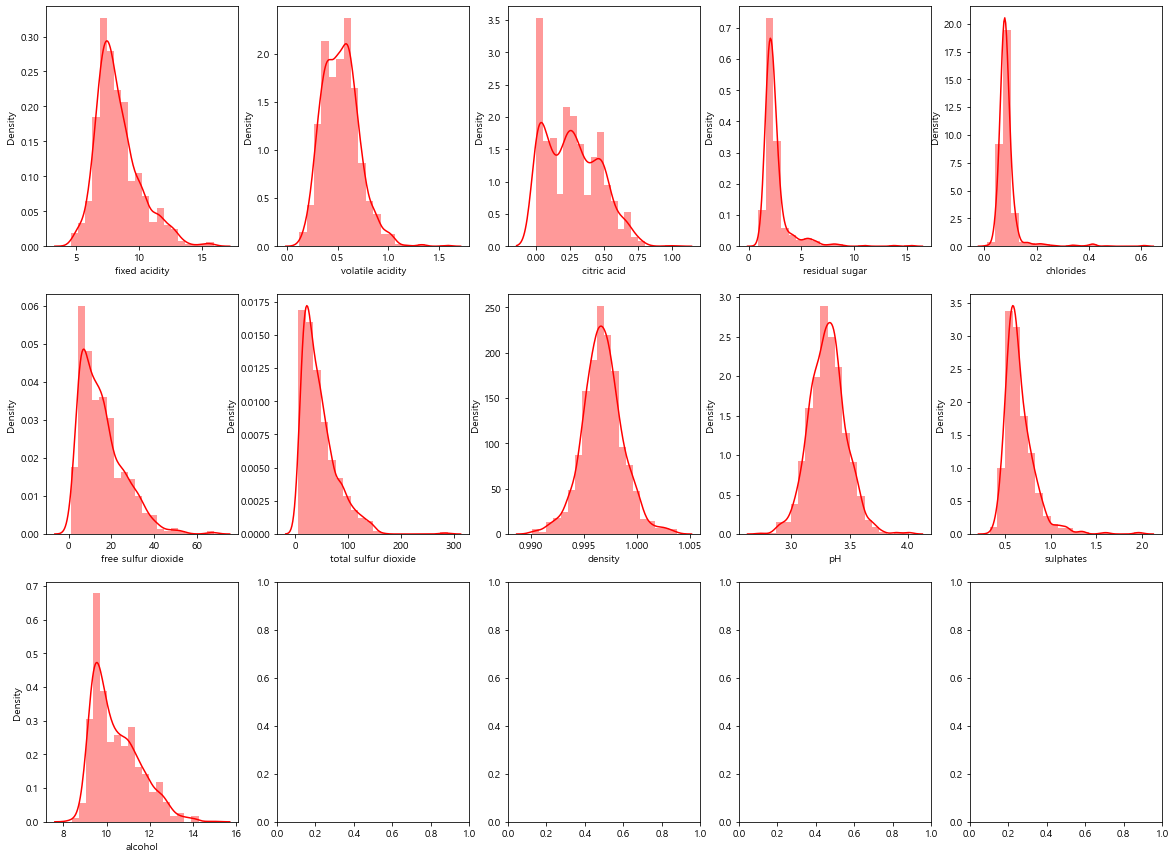

In [10]:
import seaborn as sns #heatmap 만들기 위한 라이브러리
import matplotlib.pyplot as plt
import warnings
import numpy as np
import matplotlib

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
col_n = 5
row_n = 3

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20,row_n*5))


for i,col in enumerate(x.columns):
    sns.distplot(x[col], bins=20, ax=ax[int(i/col_n),int(i%col_n)] , color='red')

In [21]:
# boxplot에서 보이는 이상치 처리 -> winsorizing 활용
# boxplot, 정규성 그래프를 확인하고 꼬리 기준으로 winsorize 실행
# 신뢰구간 99% 

from scipy.stats.mstats import winsorize

x['residual sugar'] = winsorize(x['residual sugar'], limits=[0.025, 0.025])
x['chlorides'] = winsorize(x['chlorides'], limits=[0,0.05])
x['total sulfur dioxide'] = winsorize(x['total sulfur dioxide'], limits=[0,0.01])

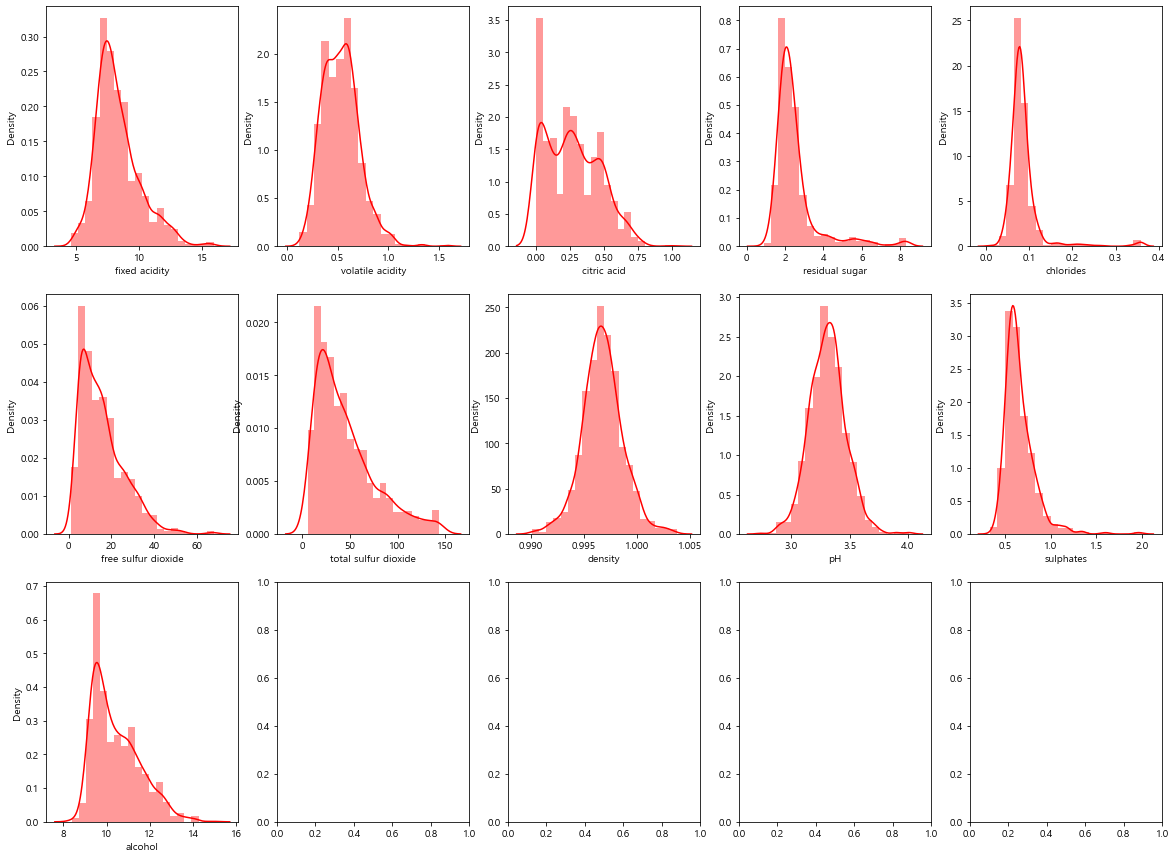

In [22]:
import seaborn as sns #heatmap 만들기 위한 라이브러리
import matplotlib.pyplot as plt
import warnings
import numpy as np
import matplotlib

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
col_n = 5
row_n = 3

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20,row_n*5))


for i,col in enumerate(x.columns):
    sns.distplot(x[col], bins=20, ax=ax[int(i/col_n),int(i%col_n)] , color='red')

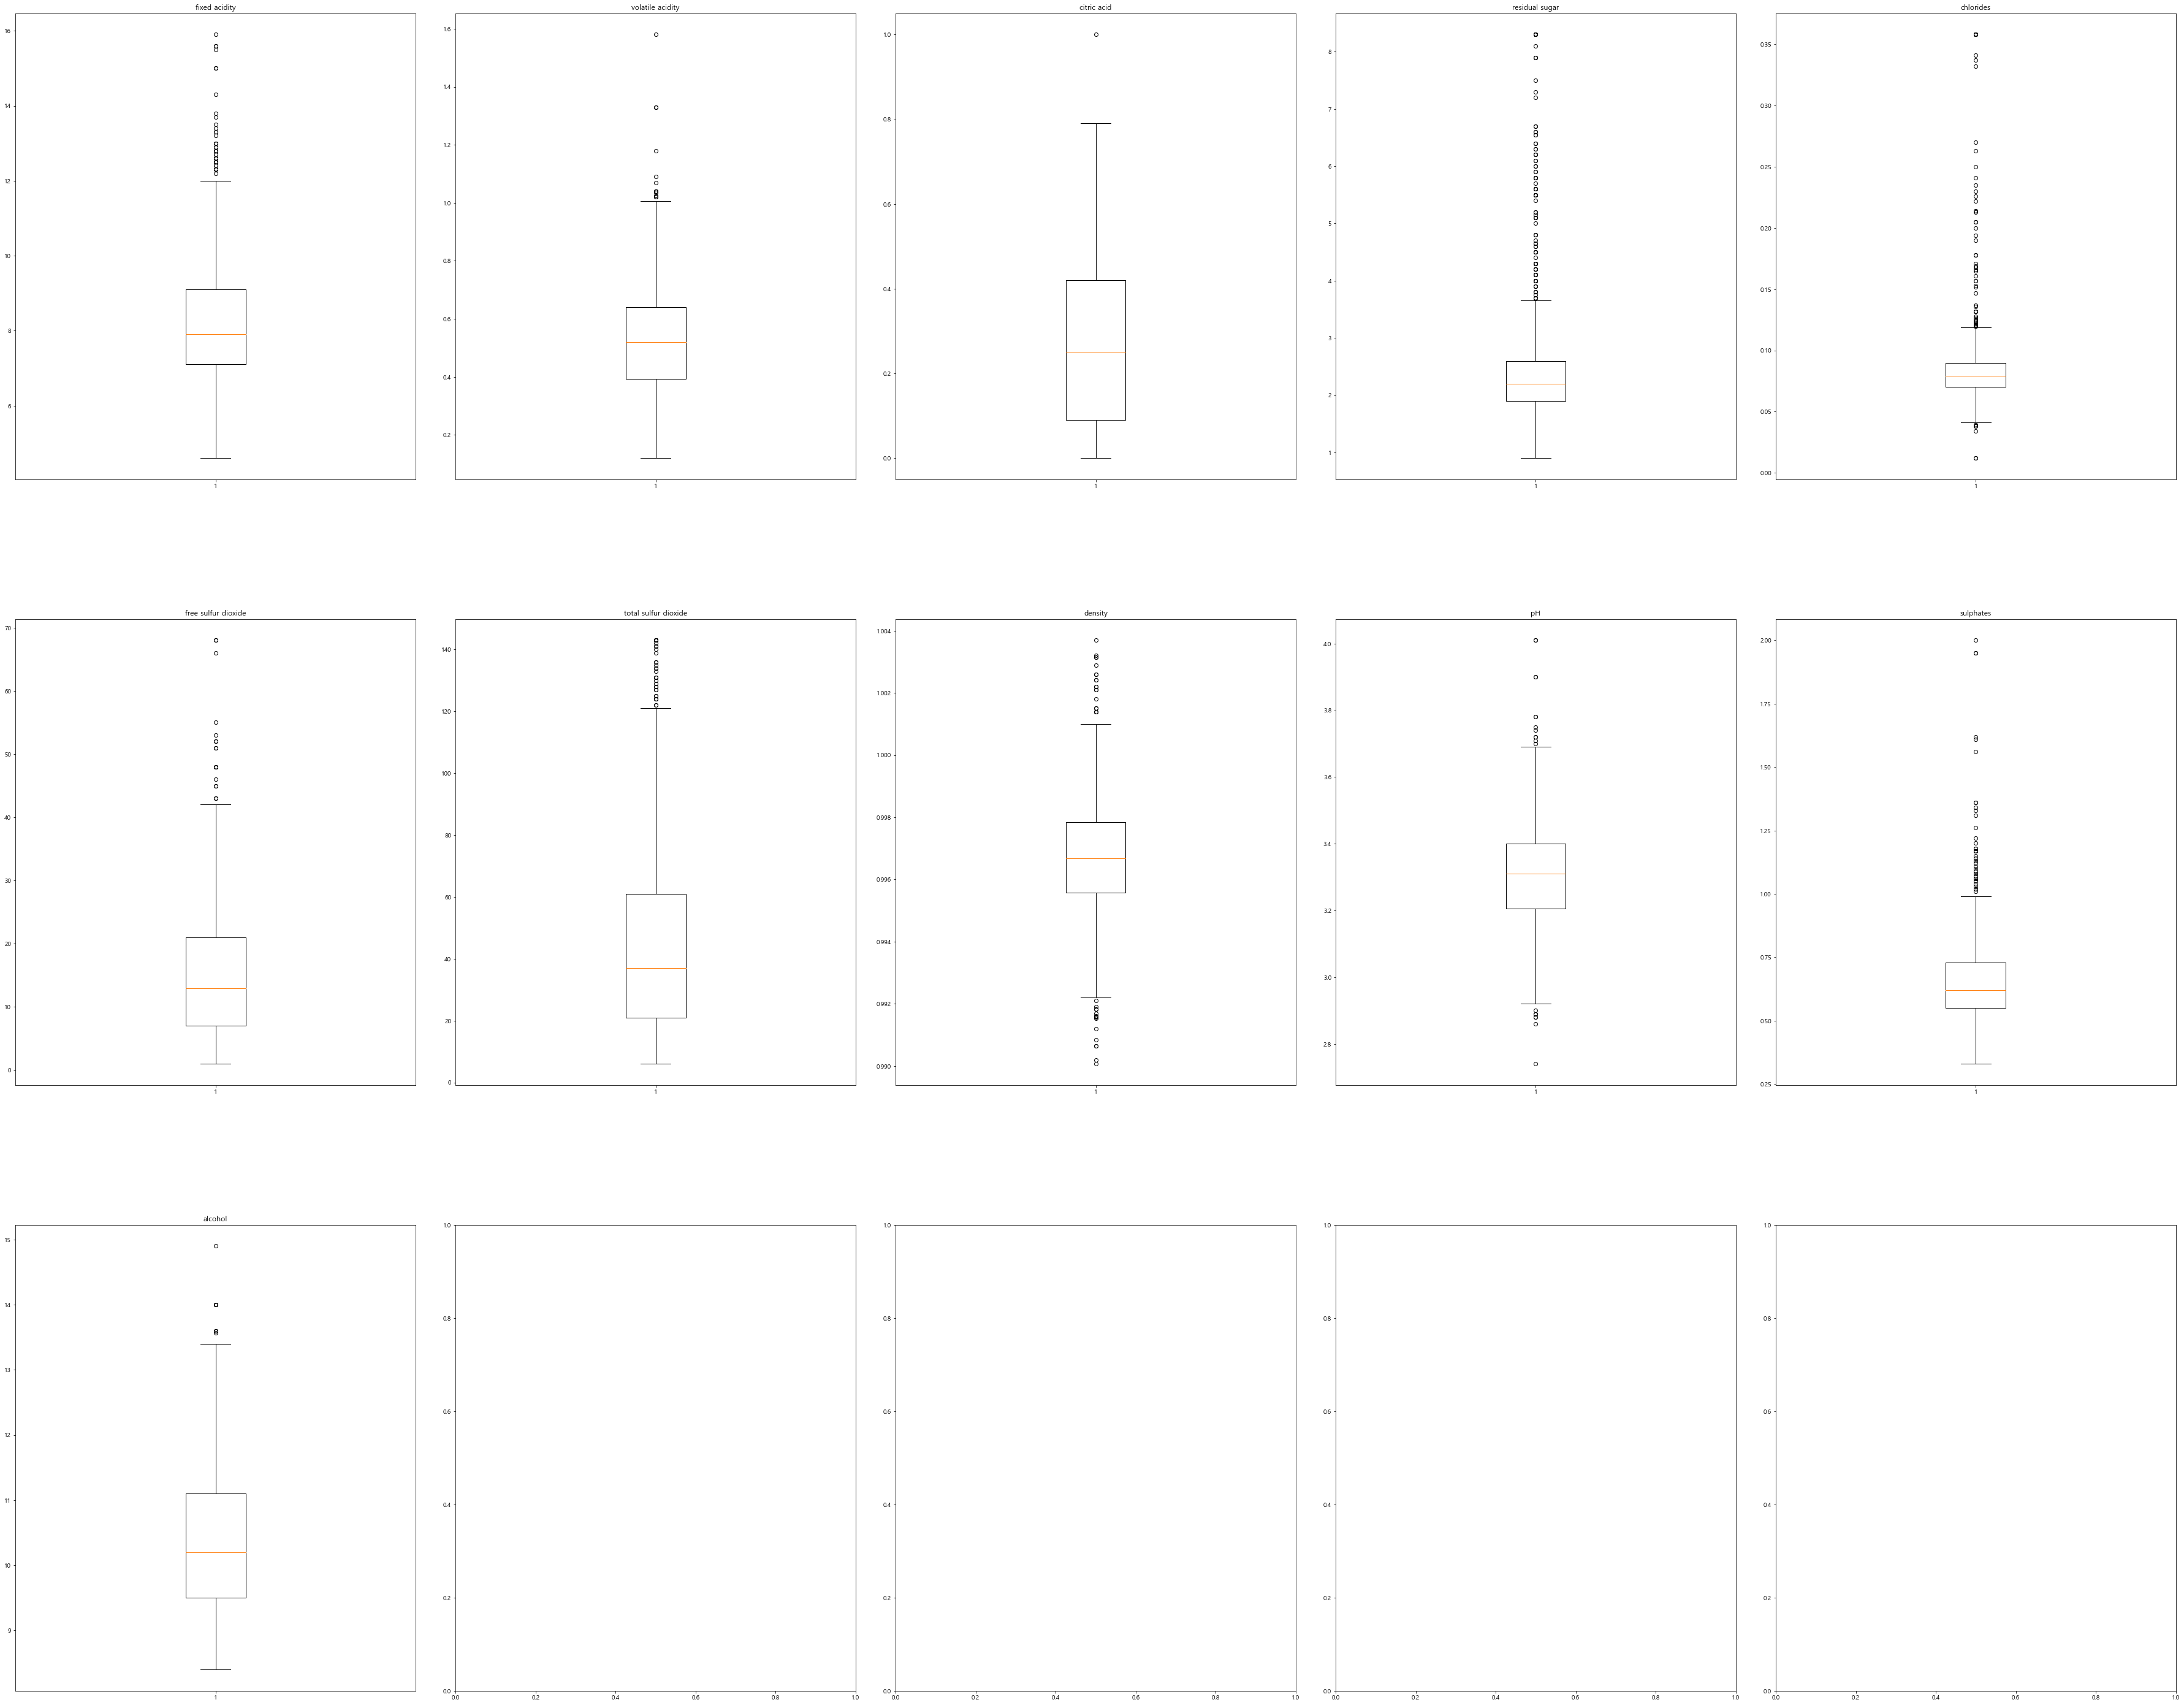

In [23]:
import seaborn as sns #heatmap 만들기 위한 라이브러리
import matplotlib.pyplot as plt
import warnings
import numpy as np
import matplotlib

matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = [5, 4]
fig, axs = plt.subplots(3, 5)
try : 
    for i in range(0,3,1):
        for j in range(0,5,1):
            if i == 0 :
                axs[i,j].boxplot(x.iloc[:,j])
                axs[i,j].set_title(x.iloc[:,j].name)
            
            if i == 1 :
                axs[i,j].boxplot(x.iloc[:,j+5])
                axs[i,j].set_title(x.iloc[:,j+5].name)

            if i == 2 :
                axs[i,j].boxplot(x.iloc[:,j+10])
                axs[i,j].set_title(x.iloc[:,j+10].name)
                
        fig.subplots_adjust(left=0.01, right=9.8, bottom=0.5, top=10,
                        hspace=0.3, wspace=0.1) 
except :
    pass